✅ Dataset Loaded Successfully!
Shape: (6607, 20)
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions 

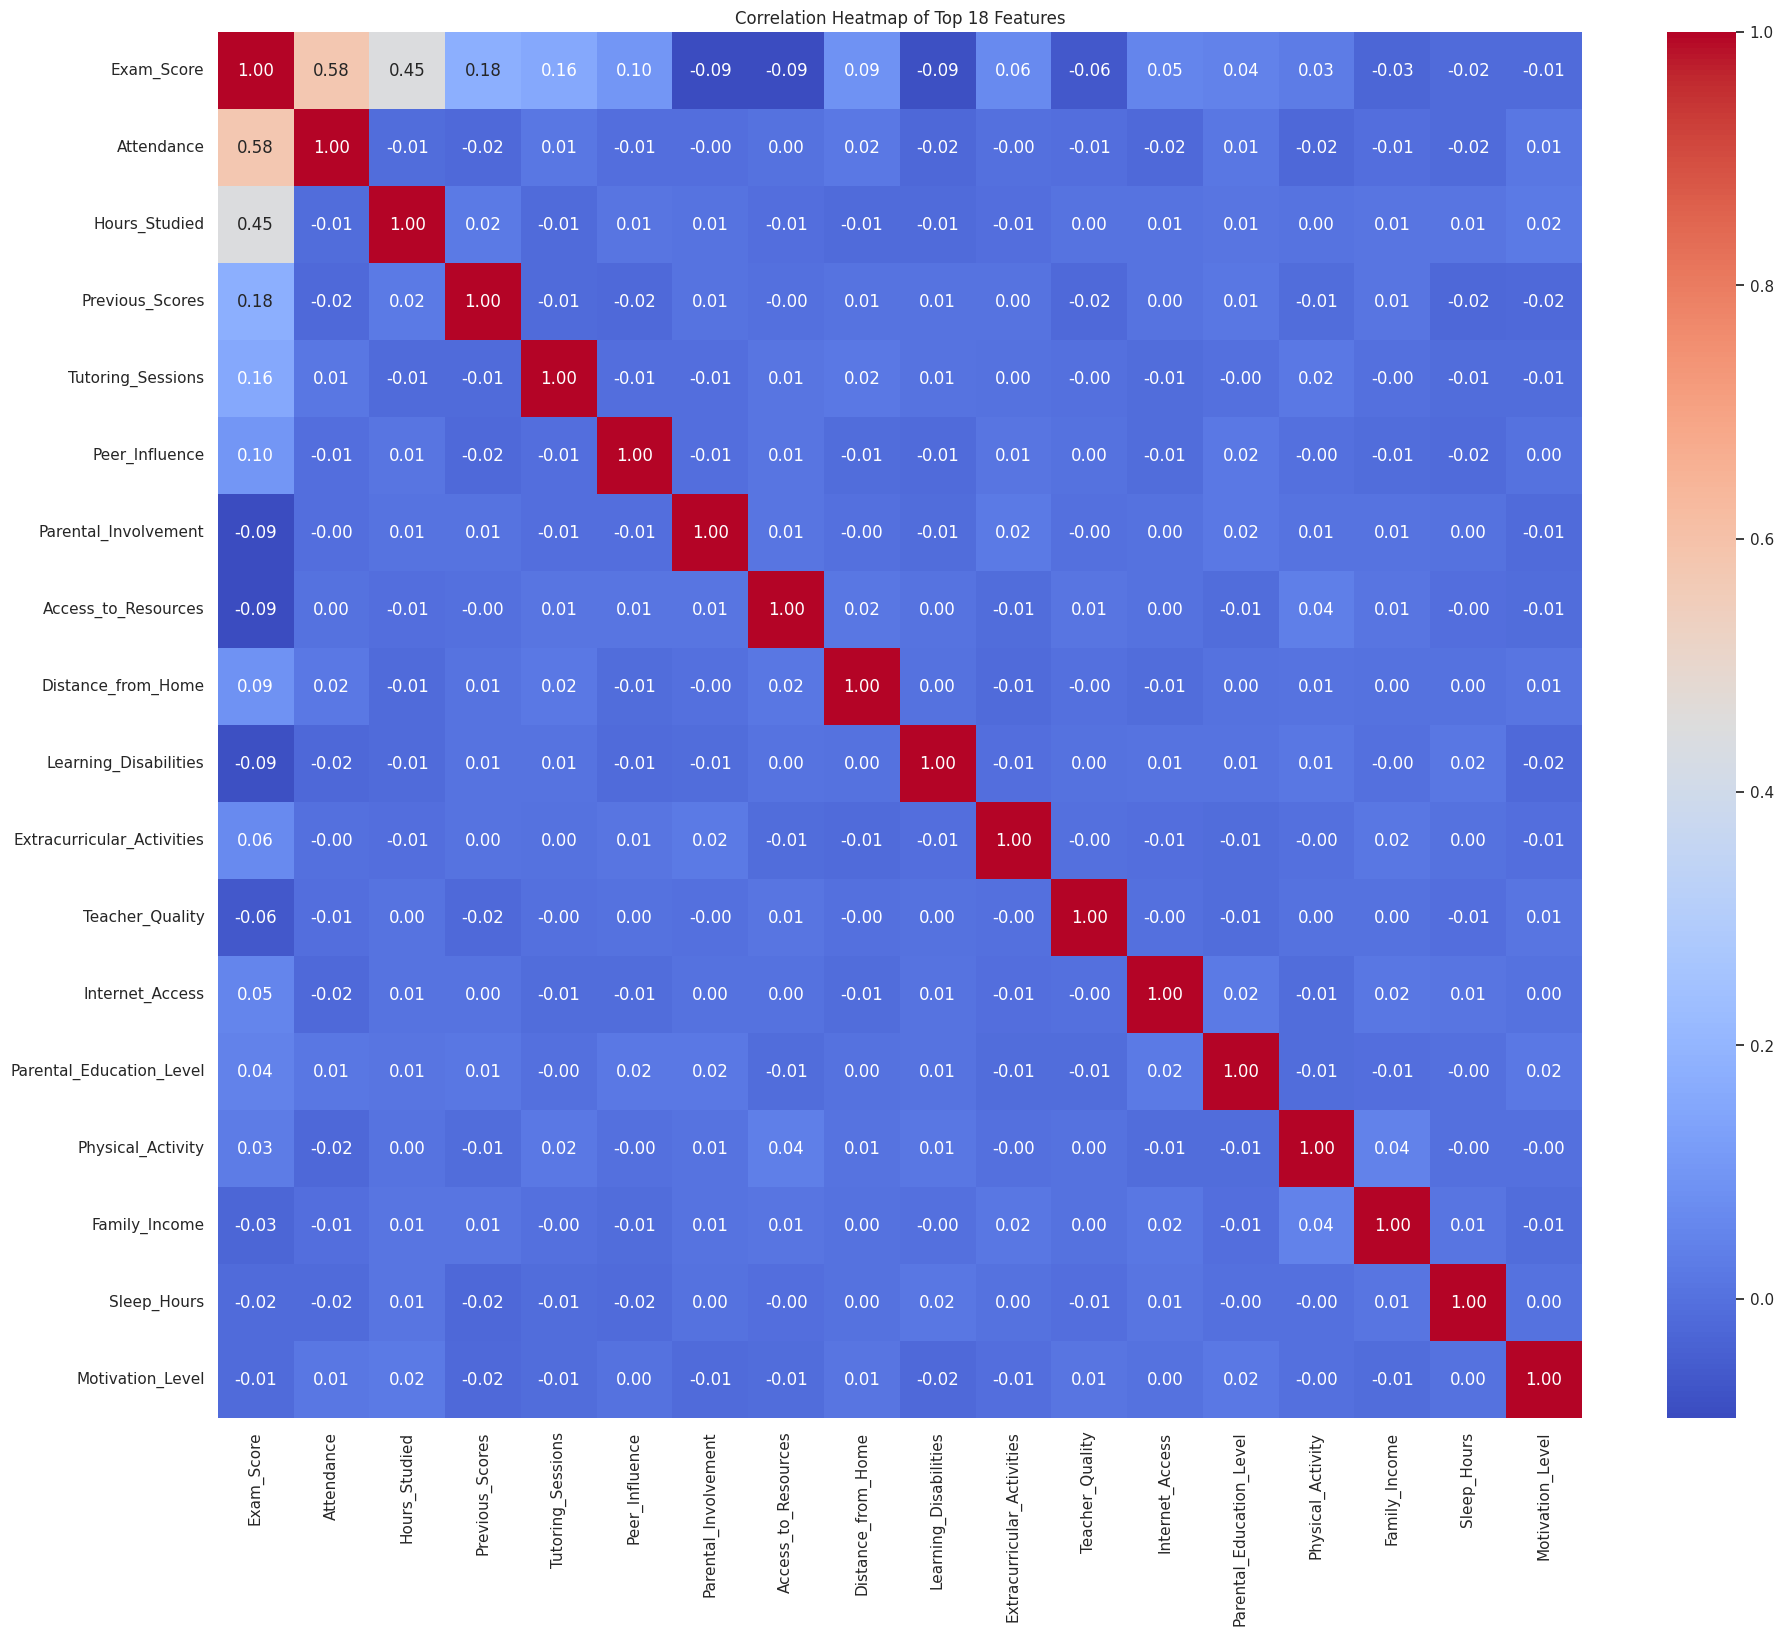

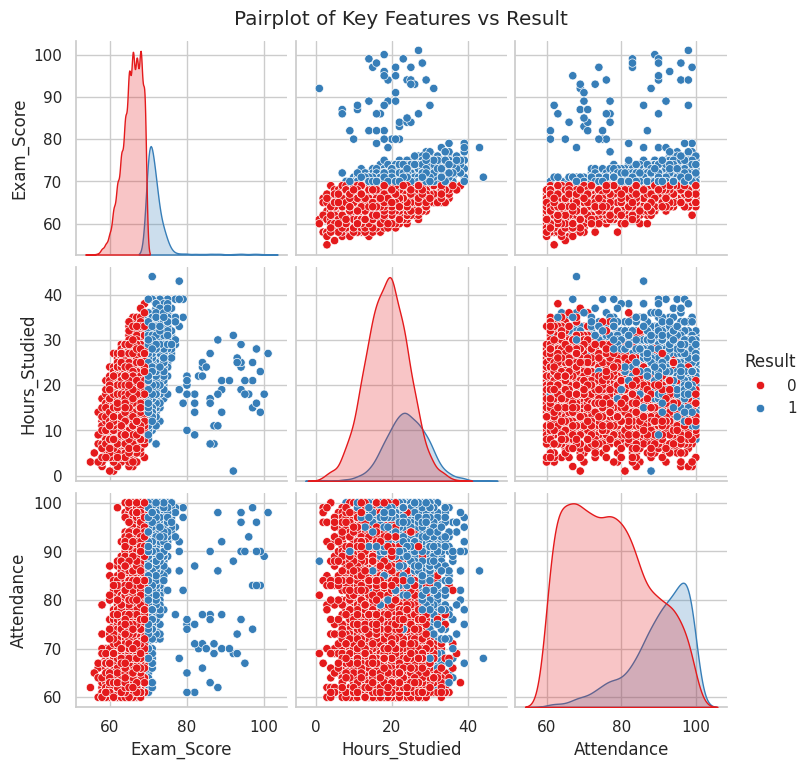

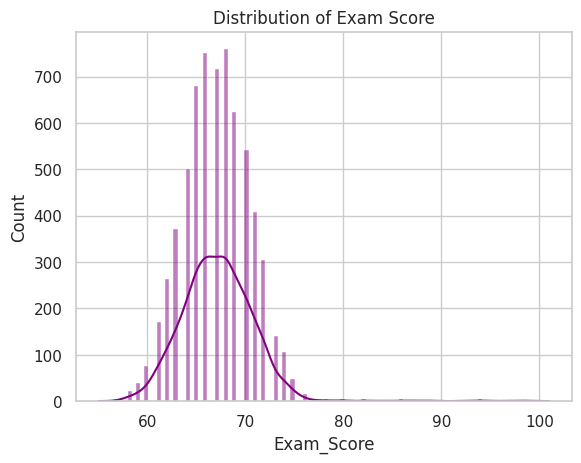

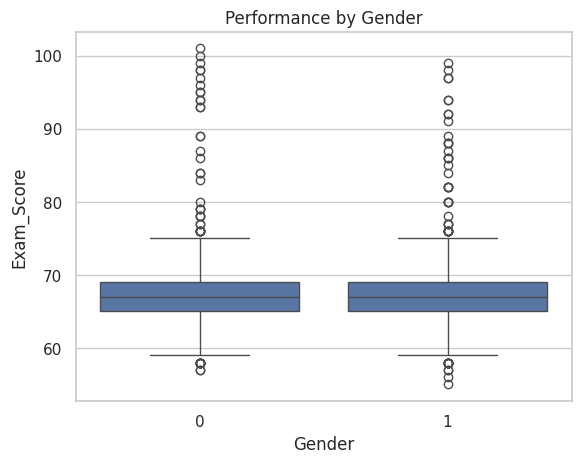

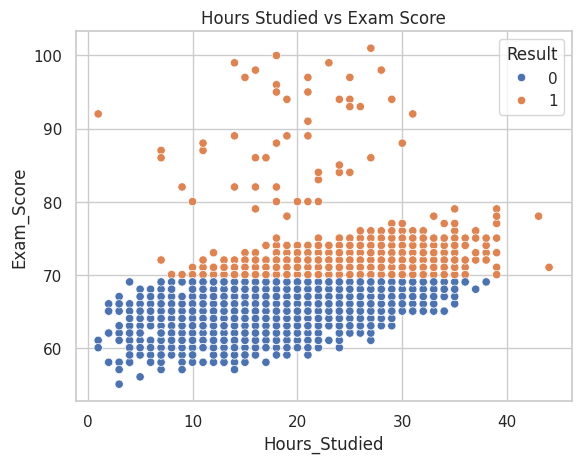


Top 10 Important Features:
 Attendance                  0.334060
Hours_Studied               0.214125
Previous_Scores             0.089153
Tutoring_Sessions           0.044232
Sleep_Hours                 0.035489
Access_to_Resources         0.034104
Physical_Activity           0.031982
Parental_Involvement        0.028015
Peer_Influence              0.025158
Parental_Education_Level    0.024150
dtype: float64

Best RF Parameters: {'max_depth': None, 'n_estimators': 150} | Score: 0.9109381755296152
Epoch 1/100
290/290 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7256 - loss: 0.5339 - val_accuracy: 0.8868 - val_loss: 0.2718
Epoch 2/100
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8847 - loss: 0.2797 - val_accuracy: 0.8959 - val_loss: 0.2445
Epoch 3/100
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8915 - loss: 0.2606 - val_accuracy: 0.9009 - val_loss: 0.2341
Epoch 4/100
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9032 - loss: 0.2430 - val_accuracy: 0.8979

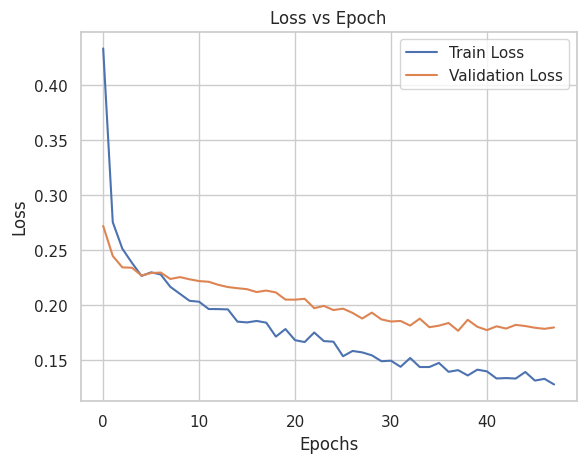

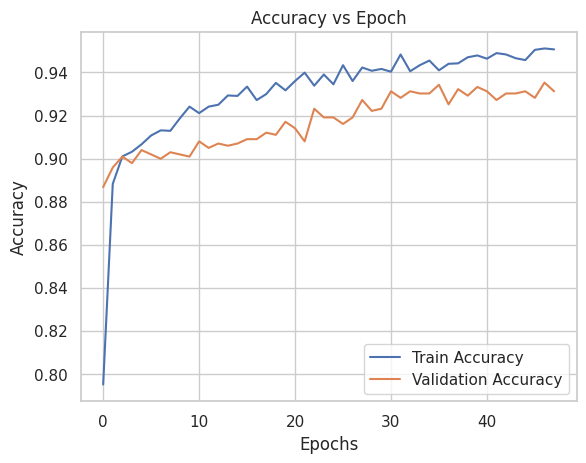

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


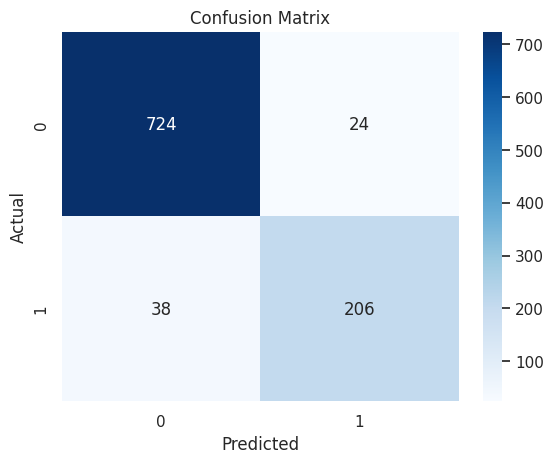

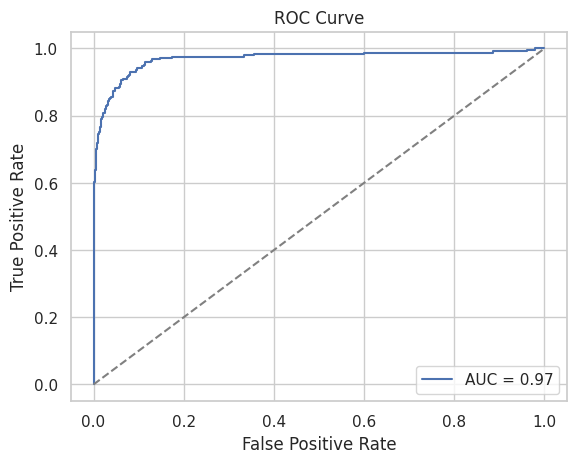


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       748
           1       0.90      0.84      0.87       244

    accuracy                           0.94       992
   macro avg       0.92      0.91      0.91       992
weighted avg       0.94      0.94      0.94       992



In [19]:
# ===============================================
# CASE STUDY: Student Performance of Theory & Practical Examination
# Dataset: Student Performance Factors (Kaggle)
# Steps 1–5 covered completely
# ===============================================

# Install dependencies (run once)
# pip install pandas numpy matplotlib seaborn scikit-learn tensorflow joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# ===============================================
# STEP 1: Load Dataset
# ===============================================

csv_path = r"/content/StudentPerformanceFactors.csv"  # <-- change this path
df = pd.read_csv(csv_path)
print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
print(df.head())

# Check column names (fix KeyError issues)
print("\nColumns in dataset:", df.columns.tolist())
df.columns = df.columns.str.strip()  # remove extra spaces if any

# Check if dataset has at least 20 features
if df.shape[1] < 20:
    print("⚠️ Dataset has fewer than 20 features.")
else:
    print(f"✅ Dataset has {df.shape[1]} columns (satisfies Step 1).")

# ===============================================
# STEP 2: Data Understanding & Preprocessing
# ===============================================

print("\n--- Dataset Info ---")
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())

# Handle missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Encode categorical variables
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Create binary classification target
df['Result'] = np.where(df['Exam_Score'] >= 70, 1, 0)

# Separate features and target
X = df.drop(['Exam_Score', 'Result'], axis=1)
y = df['Result']

# Normalize numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train, validation, and test sets (70/15/15)
X_temp, X_test, y_temp, y_test = train_test_split(
    X_scaled, y, test_size=0.15, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.176, random_state=42, stratify=y_temp
)

print(f"\nTrain: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

# ===============================================
# STEP 3: Data Visualization (Improved Heatmap Only)
# ===============================================

# 1️⃣ Correlation Heatmap (Top 18 Features)
corr_matrix = df.drop('Result', axis=1).corr()
top_features = corr_matrix['Exam_Score'].abs().sort_values(ascending=False).head(18).index

plt.figure(figsize=(22,18))  # larger figure for readability
sns.heatmap(corr_matrix.loc[top_features, top_features], annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Top 18 Features")
plt.show()

# 2️⃣ Pairplot (kept exactly as your original code)
numerical_features = ['Exam_Score', 'Hours_Studied', 'Attendance'] # Removed 'Assignments_Completed'
sns.pairplot(df[numerical_features + ['Result']], hue='Result', palette='Set1')
plt.suptitle("Pairplot of Key Features vs Result", y=1.02)
plt.show()

# 3️⃣ Histogram of Exam Score
sns.histplot(df['Exam_Score'], kde=True, color='purple')
plt.title("Distribution of Exam Score")
plt.show()

# 4️⃣ Boxplot: Performance by Gender
sns.boxplot(x='Gender', y='Exam_Score', data=df)
plt.title("Performance by Gender")
plt.show()

# 5️⃣ Scatterplot: Hours Studied vs Exam Score
sns.scatterplot(x='Hours_Studied', y='Exam_Score', hue='Result', data=df)
plt.title("Hours Studied vs Exam Score")
plt.show()

# ===============================================
# STEP 4: Model Building (RandomForest + Deep Learning)
# ===============================================

# RandomForest for Feature Importance
rf = RandomForestClassifier(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Important Features:\n", importances.head(10))

# Hyperparameter tuning
param_grid = {'n_estimators': [100, 150], 'max_depth': [None, 10]}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)
print("\nBest RF Parameters:", grid.best_params_, "| Score:", grid.best_score_)

# Deep Learning Model (MLP)
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

# ===============================================
# STEP 5: Model Evaluation Visualization
# ===============================================

# Loss vs Epoch
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Accuracy vs Epoch
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Predictions
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))